In [1]:
import os

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['text.usetex'] = True

from migdalcalc import migdalcalc as mc
from migdalcalc.migdal import quench
from migdalcalc.migdal import ionization as ion
from migdalcalc.migdal import kinematics as kin

m_n = 0.939*1e9
save_folder = './output/kinematics/'

In [2]:
Si_migdal = mc.migdalcalc(target="Si-28", nuclear_data_name="jeff33")

In [3]:
Neutron_Energies = [1, 100, 2*1e3, 23*1e3, 54*1e3, 2507*1e3]
Angles = np.linspace(0, 180, 181)

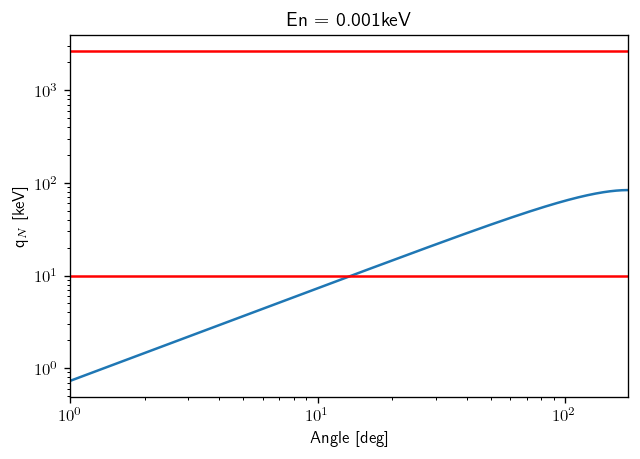

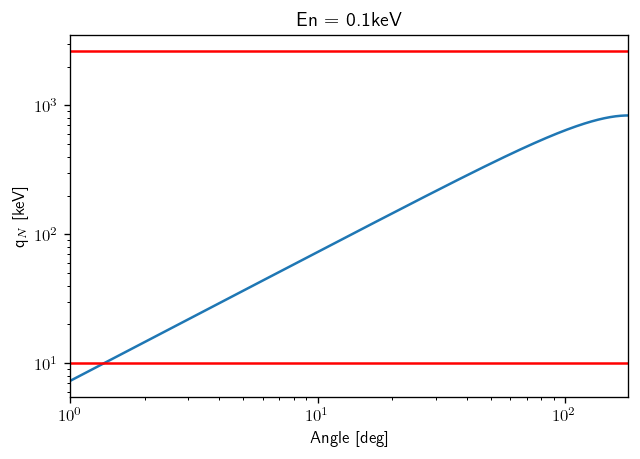

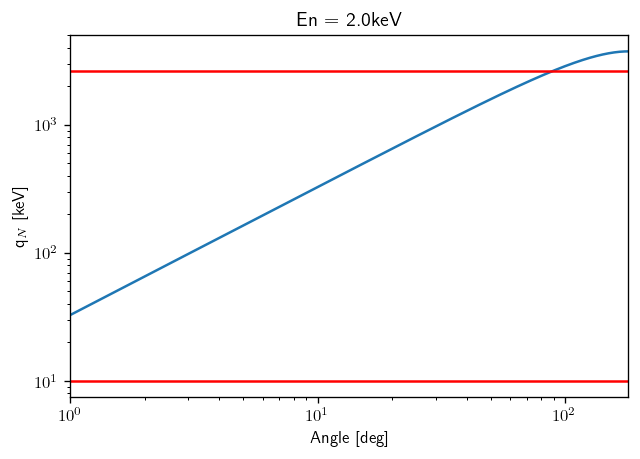

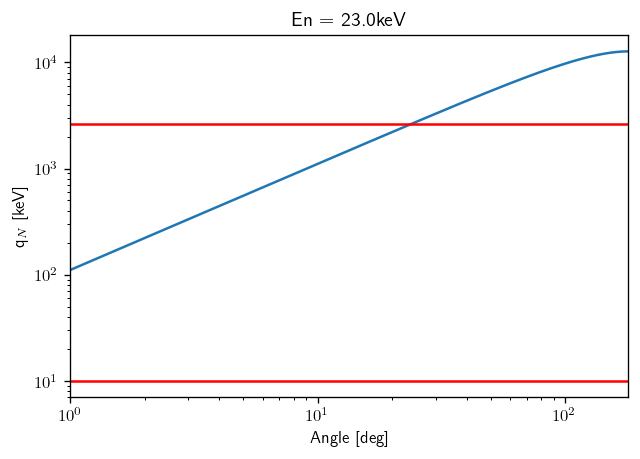

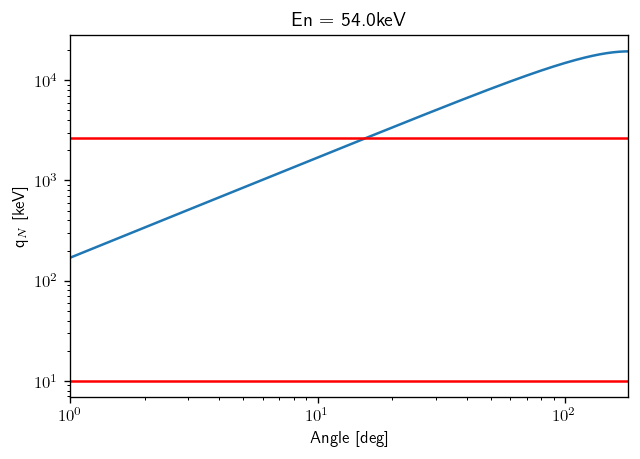

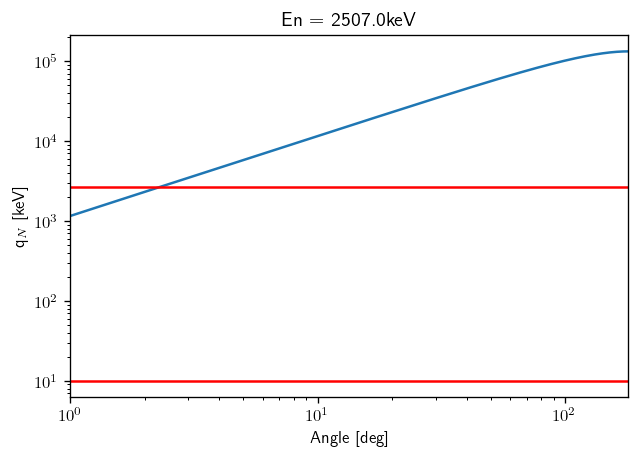

In [4]:
A = Si_migdal.A
m_N = A*m_n
k = 10*1e3 #10 keV
omega = 1 #1 eV
soft_lim_lower = k
soft_lim_upper = m_N*omega/k

for En in Neutron_Energies:
    qN_array = []
    E0 = kin.E0(A, En)
    
    for angle in Angles:
        c = np.cos(np.pi*angle/180)
        Enr = 2*(1 - c)*E0
        qN = np.sqrt(2*m_N*Enr)
        
        qN_array.append(qN*1e-3)
        
    plt.plot(Angles, qN_array)
    plt.hlines([1e-3*soft_lim_lower, 1e-3*soft_lim_upper], 0, 180, color='r')
    plt.title("En = " + str(1e-3*En) + "keV")
    plt.xlabel(r'Angle [deg]')
    plt.ylabel(r'q$_N$ [keV]')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(1, 180)
    plt.savefig(save_folder + 'soft_En_' + str(int(En)) + 'eV.png') 
    plt.show()
       
    